In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [79]:
ratings = pd.read_csv("ratings.csv")

# Choose the columns that we are interested in
ratings = ratings[["Title", "Title type", "Genres", "You rated", "IMDb Rating", "Year"]]

# Rename the (horrible) column names
ratings.rename(columns={
    'Title': 'title',
    'Title type': 'type',
    'Genres': 'genres',
    'IMDb Rating': 'ratingIMDB',
    'You rated': 'ratingMe',
    'Year': 'year'
}, inplace=True)

# Add a new column: difference of ratings
ratings["difference"] = ratings.apply(
    lambda row: row.ratingMe - row.ratingIMDB,
    axis=1)

# Show some sample data
ratings.sort_values("ratingMe", ascending=False).head()

,title,type,genres,ratingMe,ratingIMDB,year,difference
216,The Dark Knight,Feature Film,"action, crime, drama, thriller",10,9.0,2008,1.0
250,Gattaca,Feature Film,"drama, sci_fi, thriller",10,7.8,1997,2.2
217,Inception,Feature Film,"action, adventure, sci_fi, thriller",10,8.8,2010,1.2
234,A Clockwork Orange,Feature Film,"crime, drama, sci_fi",10,8.3,1971,1.7
112,Arrested Development,TV Series,comedy,10,9.0,2003,1.0


## Distribution and comparison of IMDB user ratings vs. my ratings

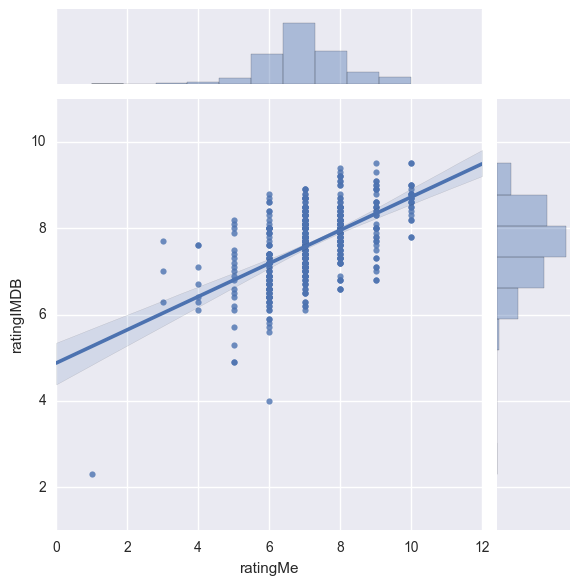

In [80]:
sns.jointplot(x="ratingMe", y="ratingIMDB",
              data=ratings, kind="reg", stat_func=None,
              marginal_kws={"bins": 10, "kde": False});

## Distributions of my ratings accross title type

Note: Everything except *Feature film* and *TV series* has too few data points

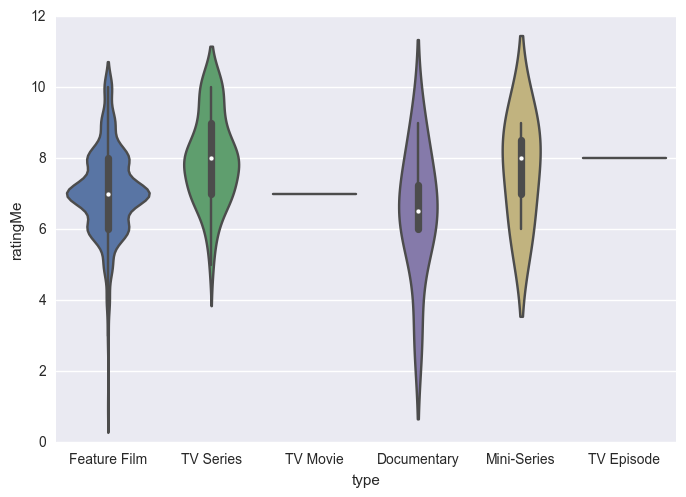

In [81]:
sns.violinplot(x="type", y="ratingMe", data=ratings);
plt.ylim([0, 12]);

## Movies I dislike (comparatively)

In [83]:
movie_ratings = ratings[ratings.type == "Feature Film"]

movie_ratings.sort_values("difference").head(10)

,title,type,genres,ratingMe,ratingIMDB,year,difference
278,300,Feature Film,"action, drama, fantasy",3,7.7,2006,-4.7
30,Warcraft,Feature Film,"action, adventure, fantasy",3,7.0,2016,-4.0
388,Superbad,Feature Film,comedy,4,7.6,2007,-3.6
492,The Raid: Redemption,Feature Film,"action, crime, thriller",4,7.6,2011,-3.6
292,Bronson,Feature Film,"action, biography, crime, drama",4,7.1,2008,-3.1
366,No Country for Old Men,Feature Film,"crime, drama, thriller",5,8.1,2007,-3.1
375,Pirates of the Caribbean: The Curse of the Bla...,Feature Film,"action, adventure, fantasy",5,8.0,2003,-3.0
351,The Hobbit: The Desolation of Smaug,Feature Film,"adventure, fantasy",5,7.9,2013,-2.9
271,Shoot 'Em Up,Feature Film,"action, comedy, crime, thriller",4,6.7,2007,-2.7
406,Once Upon a Time in the West,Feature Film,western,6,8.6,1968,-2.6


## Movies I like (comparatively)

In [84]:
movie_ratings.sort_values("difference", ascending=False).head(10)

,title,type,genres,ratingMe,ratingIMDB,year,difference
247,The Game,Feature Film,"drama, mystery, thriller",10,7.8,1997,2.2
250,Gattaca,Feature Film,"drama, sci_fi, thriller",10,7.8,1997,2.2
207,eXistenZ,Feature Film,"action, horror, sci_fi, thriller",9,6.8,1999,2.2
307,Cypher,Feature Film,"mystery, sci_fi, thriller",9,6.8,2002,2.2
252,Burn After Reading,Feature Film,"comedy, drama",9,7.0,2008,2.0
329,The Calling,Feature Film,"horror, thriller",6,4.0,2000,2.0
499,Phone Booth,Feature Film,"crime, thriller",9,7.1,2002,1.9
163,Melancholia,Feature Film,drama,9,7.1,2011,1.9
246,Gran Torino,Feature Film,drama,10,8.2,2008,1.8
241,V for Vendetta,Feature Film,"action, drama, thriller",10,8.2,2005,1.8


## TV series I dislike (comparatively)

In [86]:
series_ratings = ratings[ratings.type == "TV Series"]

series_ratings.sort_values("difference").head(10)

,title,type,genres,ratingMe,ratingIMDB,year,difference
39,Master of None,TV Series,comedy,5,8.2,2015,-3.2
185,Daredevil,TV Series,"action, crime, drama, sci_fi, thriller",6,8.8,2015,-2.8
330,The Walking Dead,TV Series,"drama, horror, thriller",6,8.6,2010,-2.6
275,Orphan Black,TV Series,"action, drama, sci_fi",6,8.4,2013,-2.4
361,Twin Peaks,TV Series,"crime, drama, mystery, thriller",7,8.9,1990,-1.9
111,Better Call Saul,TV Series,"crime, drama",7,8.7,2015,-1.7
101,The Shield,TV Series,"crime, drama, thriller",7,8.7,2002,-1.7
405,Battlestar Galactica,TV Series,"action, adventure, drama, sci_fi",7,8.7,2004,-1.7
81,Mr. Robot,TV Series,"crime, drama, thriller",7,8.7,2015,-1.7
97,Hannibal,TV Series,"crime, drama, horror, mystery, thriller",7,8.6,2013,-1.6


## TV series I like (comparatively)

In [87]:
series_ratings.sort_values("difference", ascending=False).head(10)

,title,type,genres,ratingMe,ratingIMDB,year,difference
171,Archer,TV Series,"animation, action, comedy",10,8.8,2009,1.2
108,Making a Murderer,TV Series,"documentary, crime",10,8.8,2015,1.2
27,Black Mirror,TV Series,"drama, sci_fi, thriller",10,8.9,2011,1.1
339,House of Cards,TV Series,drama,10,9.0,2013,1.0
112,Arrested Development,TV Series,comedy,10,9.0,2003,1.0
334,Breaking Bad,TV Series,"crime, drama, thriller",10,9.5,2008,0.5
2,Game of Thrones,TV Series,"adventure, drama, fantasy, romance",10,9.5,2011,0.5
100,The Simpsons,TV Series,"animation, comedy",9,8.8,1989,0.2
174,Narcos,TV Series,"biography, crime, drama",9,8.9,2015,0.1
251,Death Note,TV Series,"animation, crime, drama, fantasy, horror, myst...",9,9.0,2006,0.0


## Ratings by genre

In [94]:
genres = defaultdict(list)
for _, row in ratings.iterrows():
    for genre in row.genres.split(", "):
        genres[genre].append(row)

# Remove genres with less than 10 entries
genres = {genre: pd.DataFrame(entries)
          for genre, entries in genres.items()
          if len(entries) > 10}

# Reconstruct the DataFrames
byGenre = None
for genre, dframe in genres.items():
    dframe["genre"] = genre
    if byGenre is None:
        byGenre = dframe
    else:
        byGenre = byGenre.append(dframe)

In [95]:
topGenres = byGenre.groupby("genre").mean().sort_values("ratingMe", ascending=False)

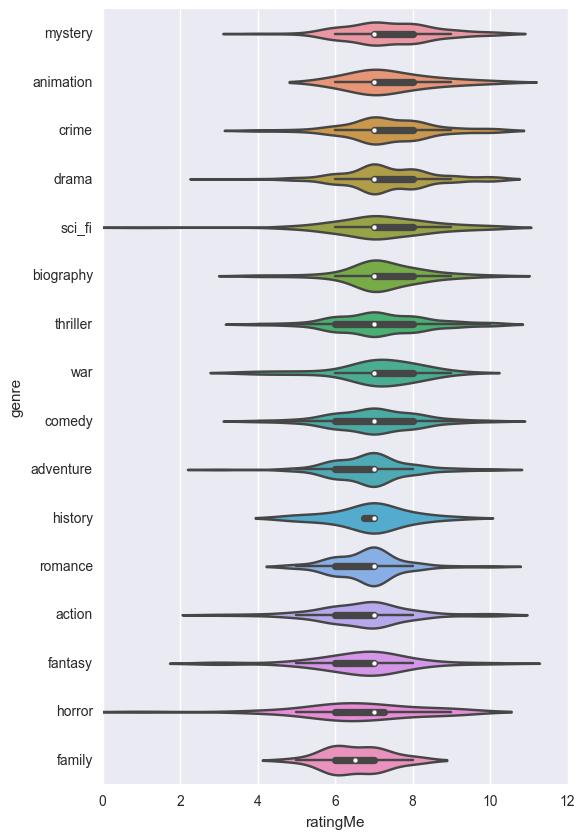

In [97]:
plt.figure(figsize=(6, 10))
sns.violinplot(x="ratingMe", y="genre", fliersize=0, data=byGenre,
            order=list(topGenres.index));
plt.xlim([0, 12]);

## Number of rated movies by year

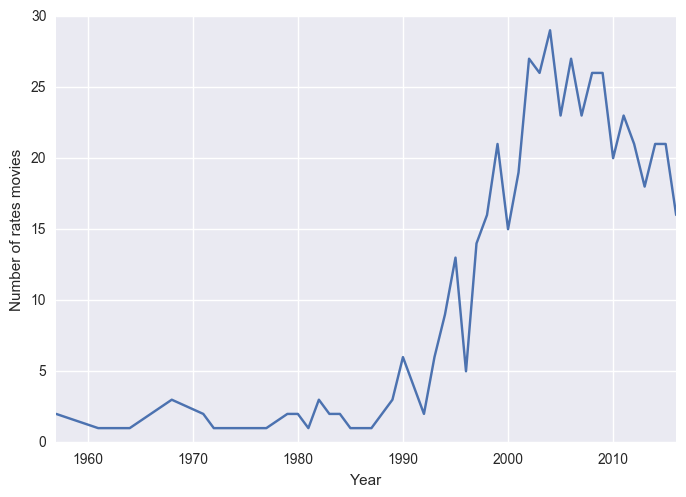

In [98]:
ratings.year.value_counts().sort_index().plot()
plt.xlabel("Year")
plt.ylabel("Number of rates movies");

## Other experiments

In [116]:
ratingsG = ratings.copy()

# Add boolean columns for the most popular genres
for genre in list(topGenres.index):
    ratingsG[genre] = ratings.genres.str.contains(genre)

# remove the original 'genres' column
ratingsG.drop('genres', axis=1, inplace=True)

ratingsG.head()

,title,type,ratingMe,ratingIMDB,year,difference,mystery,animation,crime,drama,...,thriller,war,comedy,adventure,history,romance,action,fantasy,horror,family
0,Nightcrawler,Feature Film,8,7.9,2014,0.1,False,False,True,True,...,True,False,False,False,False,False,False,False,False,False
1,Ghost in the Shell 2.0,Feature Film,7,8.0,2008,-1.0,False,True,True,True,...,False,False,False,False,False,False,True,False,False,False
2,Game of Thrones,TV Series,10,9.5,2011,0.5,False,False,False,True,...,False,False,False,True,False,True,False,True,False,False
3,Charlie and the Chocolate Factory,Feature Film,6,6.7,2005,-0.7,False,False,False,False,...,False,False,True,True,False,False,False,True,False,True
4,Cars,Feature Film,7,7.2,2006,-0.2,False,True,False,False,...,False,False,True,True,False,False,False,False,False,True


Best rated movies that are thrillers, mystery and sci-fi

In [127]:
ratingsG[ratingsG.thriller & ratingsG.mystery & ratingsG.sci_fi] \
    .sort_values('ratingMe', ascending=False) \
    .head()

,title,type,ratingMe,ratingIMDB,year,difference,mystery,animation,crime,drama,...,thriller,war,comedy,adventure,history,romance,action,fantasy,horror,family
223,The Prestige,Feature Film,10,8.5,2006,1.5,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False
18,10 Cloverfield Lane,Feature Film,9,7.3,2016,1.7,True,False,False,True,...,True,False,False,False,False,False,False,False,True,False
243,Twelve Monkeys,Feature Film,9,8.0,1995,1.0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
307,Cypher,Feature Film,9,6.8,2002,2.2,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
481,Cube,Feature Film,9,7.3,1997,1.7,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False
